实战目标：
- 掌握词云分析工具，并进行可视化呈现；
- 掌握 Python 爬虫，爬取网页数据；
- 掌握 XPath 工具，分析提取目标元素。

# 制作词云

## Python 词云工具

In [ ]:
# pip install wordcloud


wc = WordCloud(
    background_color='white',# 设置背景颜色
    mask=backgroud_Image,# 设置背景图片
    font_path='./SimHei.ttf',  # 设置字体，针对中文的情况需要设置中文字体，否则显示乱码
    max_words=100, # 设置最大的字数
    stopwords=STOPWORDS,# 设置停用词 #停用词即弃置词，如“什么”“这些”
  max_font_size=150,# 设置字体最大值
  width=2000,# 设置画布的宽度
  height=1200,# 设置画布的高度
    random_state=30# 设置多少种随机状态，即多少种颜色
)

### wordCloud 部分参数详解

WordCloud 参数详解：

In [ ]:
WordCloud(font_path=None, # 设置字体
          width=400, # 画布宽度
          height=200, # 画布高度
          margin=2, # 
          ranks_only=None, # 
          prefer_horizontal=0.9, # 
          mask=None, # 背景图片
          scale=1, # 按比例放大图例
          color_func=None, # 颜色函数
          max_words=200, # 最大字数
          min_font_size=4, # 字体最小值
          stopwords=None, # 停用词
          random_state=None, # 设置多少种随机状态，即多少种颜色
          background_color='black', # 背景颜色
          max_font_size=None, # 字体最大值
          font_step=1, # 字体步长，如果步长大于1，会加快运算但可能导致结果出现较大的误差
          mode='RGB', # 当参数为“RGB”时且 background_color 不为空时，背景透明
          relative_scaling='auto', # 相对比例
          regexp=None, # 使用正则表达式分隔输入的文本
          collocations=True, # 是否包括两个词的搭配
          colormap=None, # 给每个单词随机分配颜色，若指定color_func，则忽略该方法。
          normalize_plurals=True, # 
          contour_width=0, # 
          contour_color='black', # 
          repeat=False) # 

其他参数：

In [ ]:
fit_words(frequencies) #根据词频生成词云
generate(text) #根据文本生成词云
generate_from_frequencies(frequencies[, ...]) #根据词频生成词云
generate_from_text(text) #根据文本生成词云
process_text(text) #将长文本分词并去除屏蔽词（此处指英语，中文分词还是需要自己用别的库先行实现，使用上面的 fit_words(frequencies) recolor([random_state, color_func, colormap]) #对现有输出重新着色。重新上色会比重新生成整个词云快很多。
to_array() #转化为 numpy array
to_file(filename) #输出到文件

### 初步尝试：

根据词频计算词云


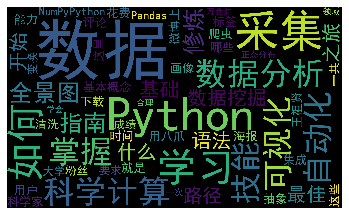

In [2]:

#-*- coding:utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np

# 生成词云
def create_word_cloud(f):
     print('根据词频计算词云')
     text = " ".join(jieba.cut(f, cut_all=False, HMM=True)) # jieba 分词
     wc = WordCloud(
           font_path="C:\Windows\Fonts\simhei.ttf", # 字体路径，避免乱码
           max_words=100, # 设置最大的字数
           width=2000, # 设置画布的宽度
           height=1200 # 设置画布的高度
    )
     wordcloud = wc.generate(text) # 根据文本内容生成词云
     
     wordcloud.to_file("wordcloud.jpg") # 输出词云图片

     plt.imshow(wordcloud) # 显示词云文件
     plt.axis("off") # 关闭坐标轴
     plt.show() # 显示词云图片

# f 的内容是陈旸老师课程前 15 节课程标题
# 好奇：能否直接读取 TXT 文件？
f = '数据分析全景图及修炼指南\
学习数据挖掘的最佳学习路径是什么？\
Python 基础语法：开始你的 Python 之旅\
Python 科学计算：NumPy\
Python 科学计算：Pandas\
学习数据分析要掌握哪些基本概念？\
用户画像：标签化就是数据的抽象能力\
数据采集：如何自动化采集数据？\
数据采集：如何用八爪鱼采集微博上的“D&G”评论？\
Python 爬虫：如何自动化下载王祖贤海报？\
数据清洗：数据科学家 80% 时间都花费在了这里？\
数据集成：这些大号一共 20 亿粉丝？\
数据变换：大学成绩要求正态分布合理么？\
数据可视化：掌握数据领域的万金油技能\
一次学会 Python 数据可视化的 10 种技能'

create_word_cloud(f)

### 去除停用词

定义停用词内容：

In [3]:
def remove_stop_words(f):
    stop_words = ['学会', '如何', '什么', '就是', '的']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

去除停用词：

根据词频计算词云


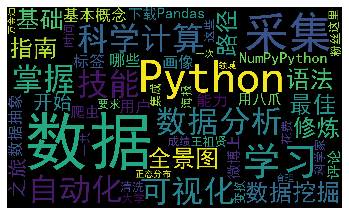

In [4]:

#-*- coding:utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np

# 生成词云
def create_word_cloud(f):
     print('根据词频计算词云')
     text = " ".join(jieba.cut(f, cut_all=False, HMM=True)) # jieba 分词
     wc = WordCloud(
           font_path="C:\Windows\Fonts\simhei.ttf", # 字体路径，避免乱码
           max_words=100, # 设置最大的字数
           width=2000, # 设置画布的宽度
           height=1200 # 设置画布的高度
    )
     wordcloud = wc.generate(text) # 根据文本内容生成词云
     
     wordcloud.to_file("wordcloud.jpg") # 输出词云图片

     plt.imshow(wordcloud) # 显示词云文件
     plt.axis("off") # 关闭坐标轴
     plt.show() # 显示词云图片

# f 的内容是陈旸老师课程前 15 节课程标题
# 好奇：能否直接读取 TXT 文件？
f = '数据分析全景图及修炼指南\
学习数据挖掘的最佳学习路径是什么？\
Python 基础语法：开始你的 Python 之旅\
Python 科学计算：NumPy\
Python 科学计算：Pandas\
学习数据分析要掌握哪些基本概念？\
用户画像：标签化就是数据的抽象能力\
数据采集：如何自动化采集数据？\
数据采集：如何用八爪鱼采集微博上的“D&G”评论？\
Python 爬虫：如何自动化下载王祖贤海报？\
数据清洗：数据科学家 80% 时间都花费在了这里？\
数据集成：这些大号一共 20 亿粉丝？\
数据变换：大学成绩要求正态分布合理么？\
数据可视化：掌握数据领域的万金油技能\
一次学会 Python 数据可视化的 10 种技能'

f = remove_stop_words(f)
create_word_cloud(f)

## 制作毛不易的歌词云

### 制作步骤

- Python 爬虫获取歌词列表


- 获取每首歌的歌词


- 获取歌词文本


- 设置词云模型


- 通过歌词生成词云


- 词云可视化

### 代码

In [6]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree

headers = {
		'Referer'	:'http://music.163.com',
		'Host'	 	:'music.163.com',
		'Accept' 	:'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
		'User-Agent':'Chrome/10'
	}

# 得到某一首歌的歌词
def get_song_lyric(headers, lyric_url):
	res = requests.request('GET', lyric_url, headers=headers)
	if 'lrc' in res.json():
		lyric = res.json()['lrc']['lyric']
		new_lyric = re.sub(r'[\d:.[\]]','',lyric)
		return new_lyric
	else:
		return ''
		print(res.json())

# 去掉停用词
def remove_stop_words(f):
	stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f

# # 生成词云
# def create_word_cloud(f):
# 	print('根据词频，开始生成词云!')
# 	f = remove_stop_words(f)
# 	cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
# 	wc = WordCloud(
# 		font_path="./wc.ttf",
# 		max_words=100,
# 		width=2000,
# 		height=1200,
#     )
# 	print(cut_text)
# 	wordcloud = wc.generate(cut_text)
# 	# 写词云图片
# 	wordcloud.to_file("wordcloud.jpg")
# 	# 显示词云文件
# 	plt.imshow(wordcloud)
# 	plt.axis("off")
# 	plt.show()


# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
	page_url = 'https://music.163.com/artist?id=' + artist_id
	# 获取网页HTML
	res = requests.request('GET', page_url, headers=headers)
	# 用XPath解析 前50首热门歌曲
	html = etree.HTML(res.text)
	href_xpath = "//*[@id='hotsong-list']//a/@href"
	name_xpath = "//*[@id='hotsong-list']//a/text()"
	hrefs = html.xpath(href_xpath)
	names = html.xpath(name_xpath)
	# 设置热门歌曲的ID，歌曲名称
	song_ids = []
	song_names = []
	for href, name in zip(hrefs, names):
		song_ids.append(href[9:])
		song_names.append(name)
# 		print(href, '  ', name)
	return song_ids, song_names

# 设置歌手ID，毛不易为12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)

# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
	# 歌词API URL
	lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
	lyric = get_song_lyric(headers, lyric_url)
	all_word = all_word + ' ' + lyric
# 	print(song_name)

# #根据词频 生成词云
# create_word_cloud(all_word)

# 个人尝试

## 制作步骤

- 使用爬虫工具获取歌词内容


- 处理歌词文本


- 使用词云工具生成词云


- 词云可视化

## 使用爬虫工具获取歌词内容

根据词频，开始生成词云!


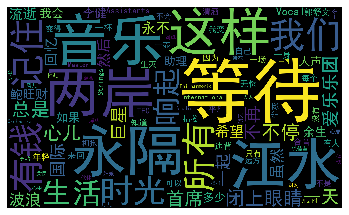

In [13]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import jieba
import matplotlib.pyplot as plt
import requests
import sys
import re
import os
from lxml import etree

# 伪造请求头
headers = {
    'Referer': 'http://music.163.com',
    'Host': 'music.163.com',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'User-Agent': 'Chrome/10'
}

# 得到某一首歌的歌词


def get_song_lyric(headers, lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
        lyric = res.json()['lrc']['lyric']
        new_lyric = re.sub(r'[\d:.[\]]', '', lyric)  # 使用正则表达式提取歌词内容
        return new_lyric
    else:
        return ''
        print(res.json())

# 得到指定歌手页面 热门前 50 的歌曲 ID ，歌曲名


def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id

    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)

    # 用 XPath 解析 前 50 首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)

    # 设置热门歌曲的 ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
        song_ids.append(href[9:])
        song_names.append(name)
    # print(href, '  ', name)
    return song_ids, song_names


# 设置歌手 ID，毛不易为 12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)

# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词 API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + \
        song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric


with open('163_maobuying_musci_lyrics.txt', 'w') as f:
    f.write(all_word)


# 查看所获数据后，去除停用词
def remove_stop_words(f):
    stop_words = ['作曲', '毛不易', '作词', '编曲', 'Arranger', '赵兆', '宋涛', '制作人', '口琴', '键盘',
                  '吉他', '贝斯', '鼓', '弦乐', '混音', '母带', '录音棚', '录音', '人声录音', '人声编辑', '录音助理',
                  '音乐制作发行', '李杨', '李游', '梁古驰', '薛峰', '韩阳', '武勇恒', '哇唧唧哇×智慧大狗',
                  '邢铜', 'Producer', 'Keyboard', 'Guitar', 'Bass', 'Drum', 'Backing Vocal', 'Mixing',
                  'Mastering  Joe LaPorta （Sterling Sound NY）', 'Studio  TEC  Beijing', 'Recording',
                  'Vocal Recording', 'Vocal Editing', 'Recording Assistants', 'produced and distributed',
                  '周天澈', '向嵬']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f


def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)  # 去除停用词
    cut_text = " ".join(jieba.cut(f, cut_all=False, HMM=True))  # 分词
    wc = WordCloud(  # 词云设置
        font_path="C:\Windows\Fonts\simhei.ttf",
        max_words=100,
        width=2000,
        height=1200,
        collocations=False
    )

    wordcloud = wc.generate(cut_text)  # 根据文本内容生成词云
    wordcloud.to_file("wordcloud_maobuyi.jpg")  # 保存词云
    plt.imshow(wordcloud)  # 显示词云
    plt.axis("off")  # 去除坐标轴
    plt.show()  # 显示


all_word = remove_stop_words(all_word)
create_word_cloud(all_word)

# 总结

问题：
1. 某些词重复出现。
<br><br>描述：“等待”在结果中出现三次，“两岸”出现两次。还有，个人使用 Notepad++ 统计字体最大的词，其结果分别是：{"两岸":36, "永隔":37, "等待":62, "我们":28, "江水":36}。暂时怀疑是分词部分出现问题，比如说可能为正确识别词语前后空格。但由于不了解 jieba 库，这个暂时不做追究。<br><br>解决办法：设置 WordCloud(collection=Fasle)。

停用词：
必须先了解毛不易的歌唱风格，而后观察数据，把可能会是停用词的数据去掉，避免出现歌手歌词中出现的人名同时也是创造参与者。也可以在词云结果出来后，在停用词中加上明显的冗余数据，比如上图中出现的“首席”、“爱乐乐团”等。

爬虫：
关于 JSON 和 XPath，个人还只能理解代码，做不到能单独写出代码。这方面仍需做努力下些功夫。因为本打算用 Web Scraper 爬取，却发现网易云的网页机制成功地防住 Web Scraper 工具。
另，网易云的反爬机制（加密），实在麻烦。如果想完全做到和老师一样信手拈来，怕是要花费不少功夫在爬虫上面，尤其是反爬机制。但，个人目前不打算往这方面走。

数据可视化：
这个案例基本是数据分析的通用流程。
- 分析目的：毛不易歌词云展示；
- 获取数据：使用 Python 爬虫从网易云音乐获取毛不易的歌词数据；
- 认识数据：查看获取的数据，并熟悉毛不易的歌词风格；
- 处理数据：设置停用词，去掉冗余数据；
- 数据可视化（数据分析）：使用分词工具、词云工具、数据可视化工具进行数据展示。
- 查看结果与现实或预计有偏差，若有，则调整再进行数据可视化。

## 练习

根据网易云歌单的 API（比如 `http://music.163.com/api/playlist/detail?id=753776811`），编写代码对歌单做词云展示。

### 根据网易云歌单的 API 制作歌单词云

根源词频计算词云


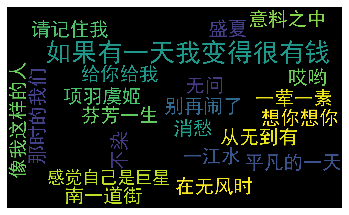

In [17]:
from wordcloud import WordCloud
import numpy as np
import jieba
from PIL import Image
import matplotlib.pyplot as plt
import requests
import sys
import re
import os
from lxml import etree


headers = {
    "Referer": 'http://music.163.com',
    "Host": 'music.163.com',
    "Accept": 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    "User-Agent": 'Chrome/10'
}


def get_song(headers):
    url = 'http://music.163.com/api/playlist/detail?id=753776811'
    res = requests.request('GET', url, headers=headers)
    page = res.json()
    tracks = page['result']['tracks']
    list = []
    for i in range(len(tracks)):
        Name = tracks[i]["name"]
        list.append(Name)
    return list


def create_WordCloud(list):
    print("根源词频计算词云")

    wc = WordCloud(
        font_path="simhei.ttf",
        max_words=100,
        width=2000,
        height=1200,
        random_state=100
    ).generate(list)
    wc.to_file("作业.jpg")
    plt.imshow(wc)
    plt.axis("off")
    plt.show()


def remove_stop_words(f):
    stop_words = ['(伴奏)', '(Demo版)', '(必胜客新春版)']
    mixed_words = ['Bonus Track：一荤一素', 'Bonus Track：给你给我']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    for mixed_word in mixed_words:
        f = f.replace(mixed_word, mixed_word[12:])
    return f

gerlists = get_song(headers)

lists_str = " ".join(gerlists)

lists = remove_stop_words(lists_str)
create_WordCloud(lists)